In [13]:
import os
import cv2
import numpy as np
import pytesseract
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

In [14]:
# Preprocesses the image by converting it to grayscale and applying Gaussian blur.
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

In [15]:
# Splits the image into rows based on the number of rows specified.
def crop_rows(image, num_rows):
    row_height = image.shape[0] // num_rows
    rows = [image[i * row_height:(i + 1) * row_height, :] for i in range(num_rows)]
    return rows


In [16]:
# Extracts the person ID from the first box in a row using OCR.
def extract_person_id(row):
    id_box = row[:, :100]
    person_id = pytesseract.image_to_string(id_box, config='--psm 6').strip()
    return person_id

In [17]:
# Extracts signatures from a given row, assuming a fixed number of signatures per row.
def extract_signatures_from_row(row):
    signature_boxes = row[:, 100:]
    num_signatures = 4  # Assuming 4 signatures per row
    signature_width = signature_boxes.shape[1] // num_signatures
    signatures = [signature_boxes[:, i * signature_width:(i + 1) * signature_width] for i in range(num_signatures)]
    return signatures

In [18]:
# Saves the extracted signatures into separate folders for each person.
def save_signatures(signatures, output_folder, person_id):
    person_folder = os.path.join(output_folder, f"person_{person_id}")
    os.makedirs(person_folder, exist_ok=True)
    for i, sig in enumerate(signatures):
        cv2.imwrite(os.path.join(person_folder, f"signature_{i+1}.png"), sig)

In [19]:
# Loads images and labels for the CNN from the specified directory.
def load_images_for_cnn(data_dir):
    images = []
    labels = []
    for person_id in os.listdir(data_dir):
        person_folder = os.path.join(data_dir, person_id)
        if os.path.isdir(person_folder):
            for img_file in os.listdir(person_folder):
                img_path = os.path.join(person_folder, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Could not load image at {img_path}. Skipping.")
                    continue
                img = cv2.resize(img, (128, 128))  # Resizing for CNN input
                images.append(img)
                labels.append(person_id)
    label_encoder.fit(labels)
    labels = label_encoder.transform(labels)
    return np.array(images), np.array(labels)

In [20]:
# Creates and compiles a CNN model for signature recognition.
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')  # Assuming 10 people (classes)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# Plots the training history for accuracy and loss.
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

Could not load image at outputData/person_, an
}
iB
*).
er

Fs
rae

/:

’ eg

: ee

‘ y

- rf

ae

‘ 1%

sane

a
na

7. Skipping.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 879ms/step - accuracy: 0.0034 - loss: 109.9609 - val_accuracy: 0.0139 - val_loss: 5.1830
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 854ms/step - accuracy: 0.0573 - loss: 4.9687 - val_accuracy: 0.0139 - val_loss: 5.2151
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 856ms/step - accuracy: 0.2568 - loss: 3.9691 - val_accuracy: 0.0208 - val_loss: 6.2224
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 856ms/step - accuracy: 0.5029 - loss: 2.4480 - val_accuracy: 0.0139 - val_loss: 7.5186
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 859ms/step - accuracy: 0.7577 - loss: 1.1763 - val_accuracy: 0.0278 - val_loss: 9.8299
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 853ms/step - accuracy: 0.9018 - loss: 0.5793 - val_accuracy: 0.0208 - val_loss: 12.9244
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 851ms/step - accuracy: 0.8934 - loss: 0.5536 - val_accuracy: 0.0208 - val_loss: 11.1917
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 833ms/step - accuracy: 0.8580 - loss: 0.7632 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

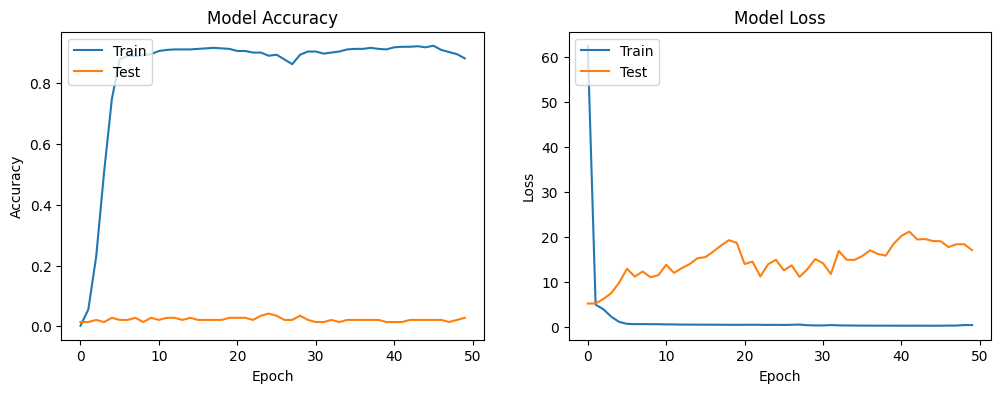

In [22]:
# Main function to process images and train CNN
if __name__ == "__main__":
    input_directory = "/content/"
    output_directory = "outputData"

    label_encoder = LabelEncoder()

    # Step 1: Process and save signatures
    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_directory, filename)
            grayscale_image = preprocess_image(image_path)
            # Split the image into rows
            rows = crop_rows(grayscale_image, num_rows=12)
            for row in rows:
                person_id = extract_person_id(row)
                if person_id:
                    signatures = extract_signatures_from_row(row)
                    save_signatures(signatures, output_directory, person_id)

    # Step 2: Load images for training
    X, y = load_images_for_cnn(output_directory)
    X = X.reshape(X.shape[0], 128, 128, 1)  # Reshape for CNN input

    if X.size == 0 or y.size == 0:
        print("Error: No images found for training.")
        exit()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    num_classes = len(np.unique(y))

    # Step 3: Train CNN
    cnn_model = create_cnn_model((128, 128, 1))
    history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

    y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
    print("CNN Model Evaluation:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    plot_history(history)